Липанов Максим Андреевич

Группа М06-106б

Алгоритм вычисления факториала числа n

0. Блок импортов

In [21]:
from time import perf_counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

1. Реализация наивного алгоритма - сложность O(n)

In [2]:
def fact_naive(n: int) -> int:
    factorial = 1

    for i in range(1, n + 1):
        factorial *= i

    return factorial


2. Релизация оптимизированного алгоритма - сложность O(log(n))

основа взята с: https://habr.com/ru/post/255761/

In [3]:
def tree(left: int, right: int) -> int:
    if left > right:
        return 1

    if left == right:
        return left

    if right - left == 1:
        return right * left

    mid = (left + right) / 2
    return tree(left, mid) * tree(mid + 1, right)

def fact_quick(n: int) -> int:

    if n <= 1:
        return 1

    if n == 2:
        return n

    return tree(2, n)

3. Релизовать расчет времени выполнения алгоритма

In [16]:
def benchmark(func, *args, **kwargs) -> float:
    start = perf_counter()

    func(*args, **kwargs)

    end = perf_counter()

    return round((end - start) * 1000, 3)


4. Подобрать параметры для расчета времени выполнения наивного и оптимизированного алгоритмов таким образом,
чтобы сложность выполнения алгоритмов возрастала

In [5]:
values = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

5.	Вычислить время выполнения наивного и оптимизированного алгоритмов для заданного набора параметров;
внести полученные данные в таблицу


In [17]:
naive_bench = [benchmark(fact_naive, i) for i in values]

tree_bench = [benchmark(fact_quick, i) for i in values]

[0.391, 6.217, 24.555, 100.789, 751.009, 3125.721]
[12.51, 60.329, 116.276, 224.224, 547.157, 1068.041]


In [18]:
data = {
    'values': values,
    'naive': naive_bench,
    'tree': tree_bench,
}

df = pd.DataFrame.from_dict(data)
print(df)

6. Визуализировать полученные данные в виде двух графиков на одной координатной плоскости
(по оси Ox – номер параметра, по оси Oy – время выполнения

Text(0, 0.5, 'time, ms')

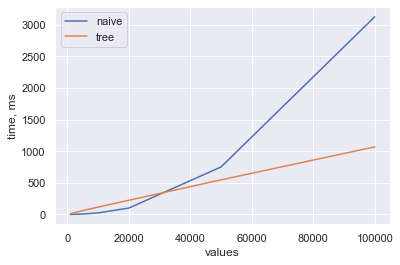

In [50]:
sns.lineplot(data=df, x='values', y='naive', legend=True, label='naive')
sns.lineplot(data=df, x='values', y='tree', legend=True, label='tree')

plt.ylabel('time, ms')


7. Исходя из полученных данных и после построения графиков, делаем вывод о том, что алгоритм наивной сортировки имеет
сложность O(n), алгоритм нахождения факториала с помощью дерева - O(log(n))